In [ ]:
import numpy as np
from numpy import linspace

import matplotlib.pyplot as plt
plt.rcParams['axes.grid'] = True
from matplotlib.pyplot import figure, savefig
%matplotlib inline

from sympy import oo, Symbol, integrate, exp, Heaviside, plot, sin, cos, Piecewise, printing, lambdify
from sympy.abc import t, x
from sympy.interactive import init_printing


## Motivation

**Goal:** analyze the impact of a transformation of the form $e[k] \to e[a k + b]$ on a signal (discrete) for various positive/negative $a$ and $b$

* $a$ acts as a **scaling on time** ($a > 1$ shrinks the signal plot). Note that negative $a$ leads to a time reversal.
* $b$ acts as **shift on time** ($b > 0$ shifts to the left) 

Relatively straight forward when only one of $a$ or $b$ are present, but some care required when both appear.

Systematic approach is to consider these as compositions of functions

In [ ]:
# transform parameters t -> a*t+b
a = 2
b = 0

# plotting range
k = np.arange(-6,11)

#   Simple hand coded example      
data = ([-3,-2,-1,0,1,2,3,4,5],[0.5,1,-1,0.5,1,-1,0,1.5,-1])

## Transformation Approach
Consider the full transformation $k \to ak + b$ as the composition of 2 steps
$$ h_1[k] = f_1[g_1[k]]$$ where $f_1[k] = e[k + b]$ (shift by $b$) and $g_1[k] = ak$ (scale by $a$) so that $h_1[k] = e[ak + b]$. 

Now consider the transforms of the signal $e[k]$ through these components $f_1$ and $g_1$

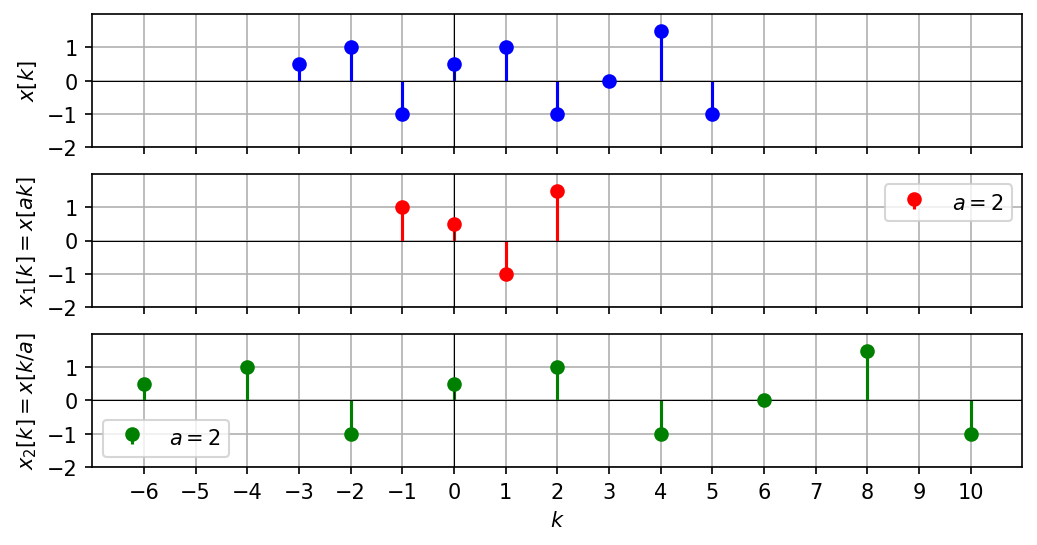

In [ ]:
# creates the transformed signal - defaults to nothing if no signal in the original
def f1(k, a = 1,b = 0):
    f1 = []
    nlist = []
    for ii in k:
        try:
            f1.append(data[1][list(data[:][0]).index(a*ii+b)])
            nlist.append(ii)
        except:
            ii
    return f1, nlist

# original signal
F1, k1 = f1(k)
# 
F2, k2 = f1(k,a,b)
F3, k3 = f1(k,1/a,b)

fig = plt.figure(figsize=(8, 4),dpi=150)
ax1 = fig.add_subplot(311)
ax1.plot([k[0]-1, k[-1]+1],[0,0],'k-',lw=0.5)
ax1.plot([0,0],[-2, 2],'k-',lw=0.5)
ax2 = fig.add_subplot(312, sharex=ax1, sharey=ax1)
ax2.plot([k[0]-1, k[-1]+1],[0,0],'k-',lw=0.5)
ax2.plot([0,0],[-2, 2],'k-',lw=0.5)
ax3 = fig.add_subplot(313, sharex=ax1, sharey=ax1)
ax3.plot([k[0]-1, k[-1]+1],[0,0],'k-',lw=0.5)
ax3.plot([0,0],[-2, 2],'k-',lw=0.5)

major_ticks = k    
ax1.set_xticks(major_ticks)
ax1.set_yticks(np.arange(-2,2))
ax1.grid(True)

markerline, stemlines, baseline = ax1.stem(k1, F1,linefmt='b',markerfmt='bo', use_line_collection = True)
plt.setp(baseline, visible=False)
markerline, stemlines, baseline = ax2.stem(k2, F2,linefmt='r',markerfmt='ro',label='$a = $'+str(a), use_line_collection = True)
plt.setp(baseline, visible=False)
ax2.legend()
markerline, stemlines, baseline = ax3.stem(k3, F3,linefmt='g',markerfmt='go',label='$a = $'+str(a), use_line_collection = True)
plt.setp(baseline, visible=False)
ax3.legend()

ax1.set_xlim([k[0]-1, k[-1]+1])
ax1.set_ylim([-2, 2])
ax1.set_ylabel('$x[k]$')
ax2.set_ylabel('$x_1[k]=x[ak]$')
ax3.set_ylabel('$x_2[k]=x[k/a]$')
ax3.set_xlabel('$k$')

plt.setp(ax1.get_xticklabels(), visible=False)
plt.setp(ax2.get_xticklabels(), visible=False)
plt.show()

Note that for some $ak$ ($a < 1$) the signal may not be specified by $x[k]$, resulting in gaps in the signal $x[ak]$. For example, note that $x2[k] = 0$ for $k=6$ because $x[3]=0$, but the dilated response at $x_2[k]$ for $k=-5,-3,-1,1,3,5,7,9$ don't exist and are left blank. 

## Consider case with $k \to 1-2k$

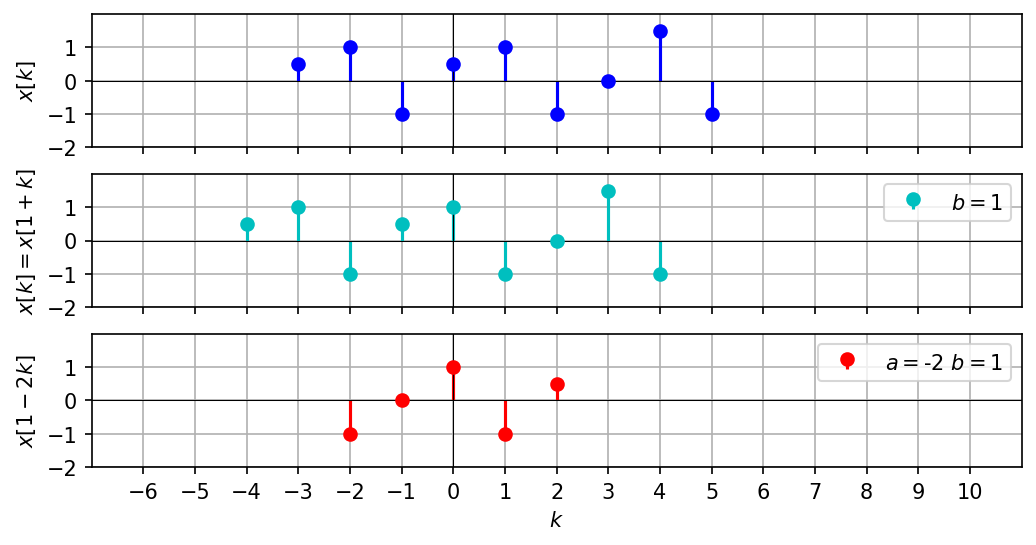

In [ ]:
# transform parameters t -> a*t+b
a = -2
b = 1

# original signal
F1, k1 = f1(k)
F2, k2 = f1(k,a,b)
F3, k3 = f1(k,1,b)

fig = plt.figure(figsize=(8, 4),dpi=150)
ax1 = fig.add_subplot(311)
ax1.plot([k[0]-1, k[-1]+1],[0,0],'k-',lw=0.5)
ax1.plot([0,0],[-2, 2],'k-',lw=0.5)
ax2 = fig.add_subplot(312, sharex=ax1, sharey=ax1)
ax2.plot([k[0]-1, k[-1]+1],[0,0],'k-',lw=0.5)
ax2.plot([0,0],[-2, 2],'k-',lw=0.5)
ax3 = fig.add_subplot(313, sharex=ax1, sharey=ax1)
ax3.plot([k[0]-1, k[-1]+1],[0,0],'k-',lw=0.5)
ax3.plot([0,0],[-2, 2],'k-',lw=0.5)

major_ticks = k    
ax1.set_xticks(major_ticks)
ax1.set_yticks(np.arange(-2,2))
ax1.grid(True)

markerline, stemlines, baseline = ax1.stem(k1, F1,linefmt='b',markerfmt='bo', use_line_collection = True)
plt.setp(baseline, visible=False)
markerline, stemlines, baseline = ax2.stem(k3, F3,linefmt='c',markerfmt='co',label='$b = $'+str(b), use_line_collection = True)
plt.setp(baseline, visible=False)
ax2.legend()
markerline, stemlines, baseline = ax3.stem(k2, F2,linefmt='r',markerfmt='ro',label='$a = $'+str(a)+' $b = $'+str(b), use_line_collection = True)
plt.setp(baseline, visible=False)
ax3.legend()

ax1.set_xlim([k[0]-1, k[-1]+1])
ax1.set_ylim([-2, 2])
ax1.set_ylabel('$x[k]$')
ax2.set_ylabel('$x[1+k]$')
ax3.set_ylabel('$x[1-2k]$')
ax3.set_xlabel('$k$')

plt.setp(ax1.get_xticklabels(), visible=False)
plt.setp(ax2.get_xticklabels(), visible=False)
plt.show()

Cyan plot shows the intermediate step (after shifting by $b=1$) - the cyan zero value at $k=2$ is then mapped to the red zero at $k=-1$ in the final result. Since $a$ is evan, all cyan values for odd $k$ are removed by the compression.